 <h2><center>Assignment</center></h2>

<h5><center>Deon S</center></h5>
<h5><center>21BDA57</center></h5>

#### 1. Have you come across Grid Search Cross Validation? Fit any two models covered in previous classes and optimize them using Grid search CV.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np
np.random.seed(0)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
df = pd.read_csv('fetal_health.csv')

In [15]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [16]:
fetal_data = df.drop_duplicates()

In [19]:
fetal_data.shape

(2113, 22)

In [22]:
X=fetal_data.drop(["fetal_health"],axis=1)
y=fetal_data["fetal_health"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [29]:
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))


Logistic Regression: 0.887574 
Decision Tree: 0.915385 
RandomForest: 0.937278 
SVC: 0.904734 


In [30]:
pred_rfc = pipeline_rf.predict(X_test)

In [31]:
print("Training Accuracy :", pipeline_rf.score(X_train, y_train))
print("Testing Accuracy :", pipeline_rf.score(X_test, y_test))

Training Accuracy : 0.9994082840236687
Testing Accuracy : 0.966903073286052


In [32]:
matrix = confusion_matrix(y_test, pred_rfc)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[338   3   0]
 [ 11  43   0]
 [  0   0  28]]


In [35]:
# Grid Search CV
GBC = GradientBoostingClassifier()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [37]:
 parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

In [40]:
grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBC.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]})

In [42]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.03, max_depth=4, n_estimators=500,
                           subsample=0.5)

 The best score across ALL searched params:
 0.9384668836630947

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}


#### 2. What is Stride, Padding & Pooling? Explain with an example.

##### Strides

When the array is created, the pixels are shifted over to the input matrix. The number of pixels turning to the input matrix is known as the strides. When the number of strides is 1, we move the filters to 1 pixel at a time. Similarly, when the number of strides is 2, we carry the filters to 2 pixels, and so on. They are essential because they control the convolution of the filter against the input, i.e., Strides are responsible for regulating the features that could be missed while flattening the image. 
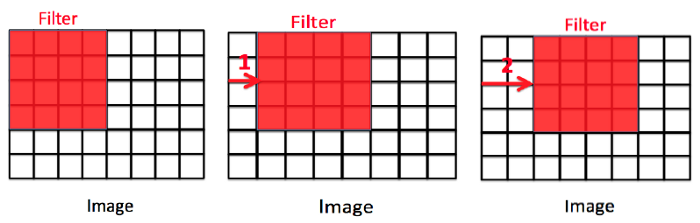

In the first matrix, the stride = 0, second image: stride=2, and the third image: stride=2. The size of the output image is calculated by:

[{(n+2p-f+1)/s}+1][{(n+2p-f+1)/s}]


##### Padding

The padding plays a vital role in creating CNN. After the convolution operation, the original size of the image is shrunk. Also, in the image classification task, there are multiple convolution layers after which our original image is shrunk after every step, which we don’t want. 

Secondly, when the kernel moves over the original image, it passes through the middle layer more times than the edge layers, due to which there occurs an overlap.

To overcome this problem, a new concept was introduced named padding. It is an additional layer that can add to the borders of an image while preserving the size of the original picture.

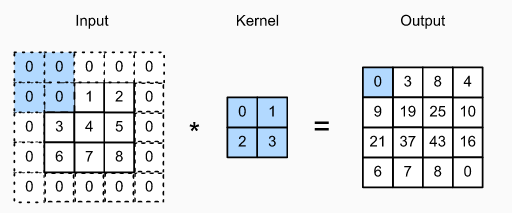

##### Pooling
In the pre-process, the image size shrinks by reducing the number of parameters if the image is too large. When the picture is shrunk, the pixel density is also reduced, the downscaled image is obtained from the previous layers. Basically, its function is to progressively reduce the spatial size of the image to reduce the network complexity and computational cost. 

Spatial pooling is also known as downsampling or subsampling that reduces the dimensionality of each map but retains the essential features. A rectified linear activation function, or ReLU, is applied to each value in the feature map. Relu is a simple and effective nonlinearity that does not change the values in the feature map but is present because later subsequent pooling layers are added. Pooling is added after the nonlinearity is applied to the feature maps.

##### 1. Max Pooling
Max pooling is a rule to take the maximum of a region and help to proceed with the most crucial features from the image. It is a sample-based process that transfers continuous functions into discrete counterparts. Its primary objective is to downscale an input by reducing its dimensionality and making assumptions about features contained in the sub-region that were rejected.
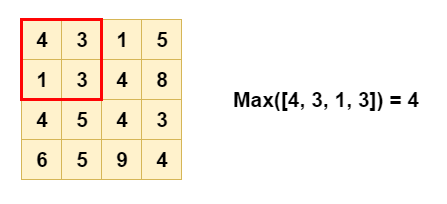
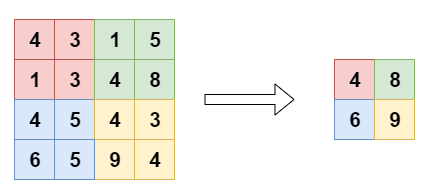

##### 2. Average Pooling
It is different from Max Pooling; it retains information about the lesser essential features. It simply downscales by dividing the input matrix into rectangular regions and calculating the average values of each area. 

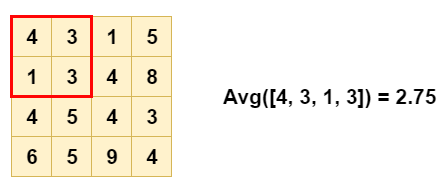
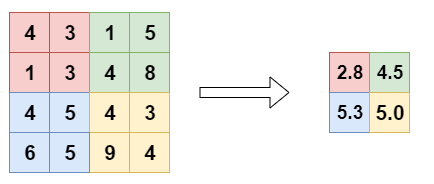

##### 3. Sum Pooling
It is similar to Max pooling, but instead of calculating the maximum value, we calculate the mean of each sub-region.


Ref: https://www.codingninjas.com/codestudio/library/convolution-layer-padding-stride-and-pooling-in-cnn

## ********************************************************************************************************************************

#### 3. Fit a CNN model on the dataset which has been assigned to you. Print a classification report to see the model metrics on train and test datasets.

In [2]:
#importing libraries 
import os
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [53]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [54]:
#loading the dataset
train_dataset = train.flow_from_directory(r"C:\Users\LENOVO\Documents\SEMESTER 2\CHJT\training",
                                          target_size=(200,200),
                                          class_mode = 'categorical')
                                         
test_dataset = test.flow_from_directory(r"C:\Users\LENOVO\Documents\SEMESTER 2\CHJT\testing",
                                          target_size=(200,200),
                                          class_mode = 'categorical')

Found 3600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


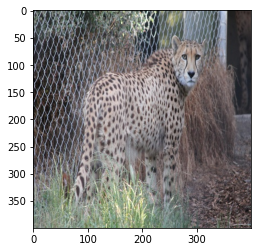

In [57]:
img=cv2.imread(r'C:\Users\LENOVO\Documents\SEMESTER 2\CHJT\training\cheetah_train_resized\cheetah_000_resized.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [58]:
#to check the shape of the image
cv2.imread(r'C:\Users\LENOVO\Documents\SEMESTER 2\CHJT\training\cheetah_train_resized\cheetah_000_resized.jpg').shape

(400, 400, 3)

In [59]:
num_classes = 4
input_shape = (400, 400, 3)

In [60]:
# Model Building

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       1

In [61]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
# Train the model

history = model.fit(train_dataset, epochs=20, 
                    validation_data=(test_dataset))

Epoch 1/20
113/113 [==============================] - 143s 1s/step - loss: 0.5932 - accuracy: 0.7289 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 2/20
113/113 [==============================] - 145s 1s/step - loss: 0.5624 - accuracy: 0.7500 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 3/20
113/113 [==============================] - 142s 1s/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 4/20
113/113 [==============================] - 143s 1s/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 5/20
113/113 [==============================] - 146s 1s/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 6/20
113/113 [==============================] - 146s 1s/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 7/20
113/113 [==============================] - 144s 1s/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5623 - val_accuracy: 0.7500

In [15]:
#Saving the Model

tf.keras.models.save_model(model,'best_model.hdf5')

Plotting accuracy versus epoch
The model is being evaluated
13/13 - 5s - loss: 0.5623 - accuracy: 0.7500
The accuracy of the model is:
0.75


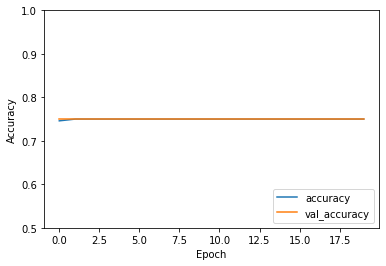

In [63]:
#plotting the accuracy graph
print("Plotting accuracy versus epoch")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
print("The model is being evaluated")
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print("The accuracy of the model is:")
print(test_acc)

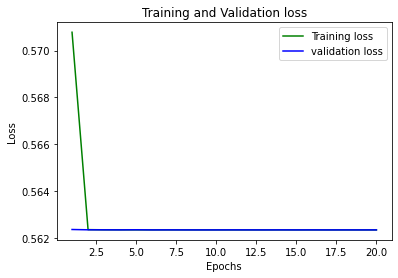

In [65]:
#plotting the training and validation loss 
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### 4. What is overfitting? How to overcome overfitting in an ML model?

Overfitting occurs when you achieve a good fit of your model on the training data, while it does not generalize well on new, unseen data. In other words, the model learned patterns specific to the training data, which are irrelevant in other data.


`1.	Cross-Validation:`
The idea behind this is to use the initial training data to generate mini train-test-splits, and then use these splits to tune your model.
In a standard k-fold validation, the data is partitioned into k-subsets also known as folds. After this, the algorithm is trained iteratively on k-1 folds while using the remaining folds as the test set, also known as holdout fold.
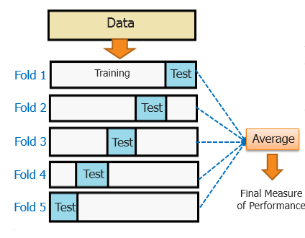
 
`2.	Training With More Data:`
This technique might not work every time, as we have also discussed in the example above, where training with a significant amount of population helps the model. It basically helps the model in identifying the signal better.

But in some cases, the increased data can also mean feeding more noise to the model. When we are training the model with more data, we have to make sure the data is clean and free from randomness and inconsistencies.


`3.	Removing Features:`
For a significant number of those who do not have a built-in feature selection, we can manually remove a few irrelevant features from the input features to improve the generalization.
One way to do it is by deriving a conclusion as to how a feature fits into the model. It is quite similar to debugging the code line-by-line.

`4.	Early Stopping:`
When the model is training, you can actually measure how well the model performs based on each iteration. We can do this until a point when the iterations improve the model’s performance. After this, the model overfits the training data as the generalization weakens after each iteration.
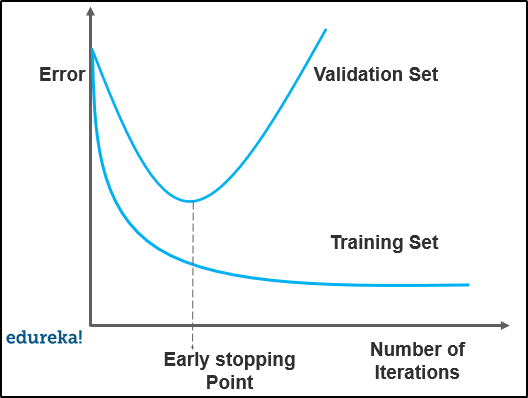

`5.	Regularization:`
Regularization is a technique to reduce the complexity of the model. It does so by adding a penalty term to the loss function. The most common techniques are known as L1 and L2 regularization.
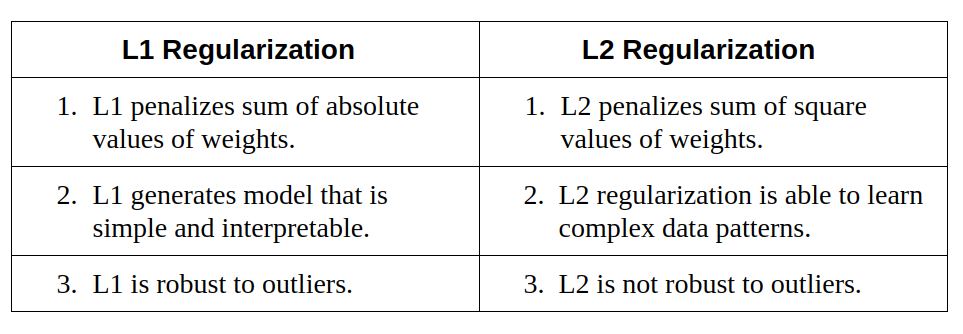


`6.	Ensembling:`
This technique basically combines predictions from different Machine Learning models. Two of the most common methods for ensembling are listed below:

- Bagging attempts to reduce the chance overfitting the models

- Boosting attempts to improve the predictive flexibility of simpler models

Even though they are both ensemble methods, the approach totally starts from opposite directions. Bagging uses complex base models and tries to smooth out their predictions while boosting uses simple base models and tries to boost its aggregate complexity.


Ref: https://www.edureka.co/blog/overfitting-in-machine-learning/